In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning and Preprocessing:

## Load the dataset

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')  

## 1. Handle Missing Values

In [3]:
# Convert 'TotalCharges' to numeric, setting failed conversions to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

running = 0
count = 0

# Calculating the average cost...
average_TotalCharges = round(df['TotalCharges'].mean(), 2)

# Replacing missing values with average cost using a for loop...
for i in range(len(df)):
    if pd.isnull(df.loc[i, 'TotalCharges']):       #isnull() function is used to check if there is any null values...
        df.loc[i, 'TotalCharges'] = average_TotalCharges      #loc is searching the label 'TotalCharges' and put the average cost.

    #else function is used to iterate the loop if there is no missing values...
    else:
        running += df.loc[i, 'TotalCharges']
        count += 1

# Save the updated DataFrame back to the CSV file
df.to_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', index=False) 


## 2. Convert Categorical Data to Numerical Format

In [4]:
# Get a list of categorical columns (object type)
categorical_cols = df.select_dtypes(include=['object']).columns

# Use pandas get_dummies for one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols)

## 3. Standardize Numerical Columns

In [5]:
# Select numerical columns to standardize
numerical_cols = ['MonthlyCharges', 'TotalCharges']

# Use StandardScaler for standardization
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


# Exploratory Data Analysis (EDA):

## 1. Analyze churn rates by various features such as contract type, internet service type, & monthly charges. 
## Visualize data using charts (bar plots, histograms, box plots, etc)

### Read the data cleaned & pre-processed file-

In [6]:
# Read the CSV file into a DataFrame
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

### Churn by Contract and Internet Service in table format-

In [7]:
# Analyze churn rates by contract type
churn_by_contract = df.groupby(['Contract', 'Churn']).size().unstack()

# Analyze churn rates by internet service type
churn_by_internet_service = df.groupby(['InternetService', 'Churn']).size().unstack()

# Print the results
print("Churn by Contract: \n", churn_by_contract.to_markdown(numalign="left", stralign="left"))
print("\nChurn by Internet Service: \n", churn_by_internet_service.to_markdown(numalign="left", stralign="left"))

Churn by Contract: 
 | Contract       | No   | Yes   |
|:---------------|:-----|:------|
| Month-to-month | 2220 | 1655  |
| One year       | 1307 | 166   |
| Two year       | 1647 | 48    |

Churn by Internet Service: 
 | InternetService   | No   | Yes   |
|:------------------|:-----|:------|
| DSL               | 1962 | 459   |
| Fiber optic       | 1799 | 1297  |
| No                | 1413 | 113   |


### Churn by Contract-

<Figure size 800x500 with 0 Axes>

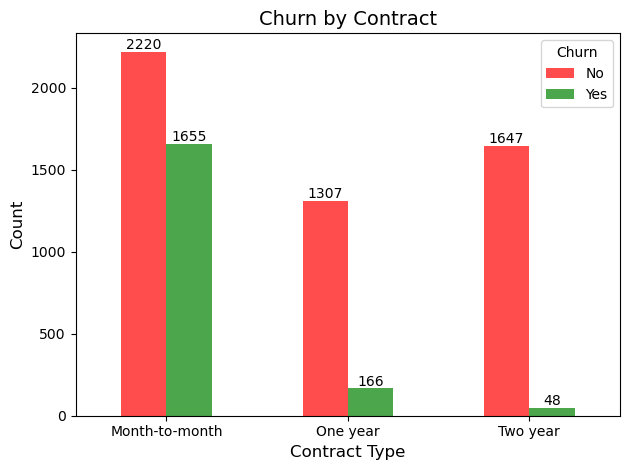

In [8]:
# Analyze churn rates by contract type
churn_by_contract = df.groupby(['Contract', 'Churn']).size().unstack()

plt.figure(figsize=(8, 5))

ax = churn_by_contract.plot(kind='bar', rot=0, alpha=0.7, color=['red', 'green'])
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Churn by Contract', fontsize=14)
plt.legend(title='Churn')

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.savefig('Churn by Contract.png')
plt.show()

### Churn by Internet Service-

<Figure size 800x500 with 0 Axes>

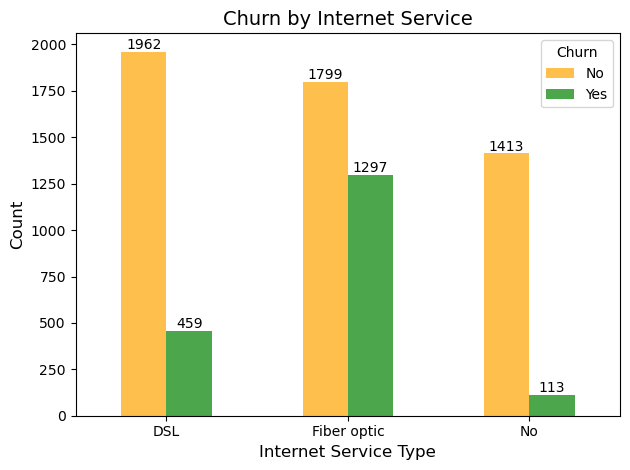

In [9]:
# Analyze churn rates by internet service type
churn_by_internet_service = df.groupby(['InternetService', 'Churn']).size().unstack()

plt.figure(figsize=(8, 5))

axx = churn_by_internet_service.plot(kind='bar', rot=0, alpha=0.7, color=['orange', 'green'])
plt.xlabel('Internet Service Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Churn by Internet Service', fontsize=14)
plt.legend(title='Churn')

# Add values on top of the bars
for p in axx.patches:
    axx.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.savefig('Churn by Internet Service.png')
plt.show()

### Visualize churn by Monthly Charges-

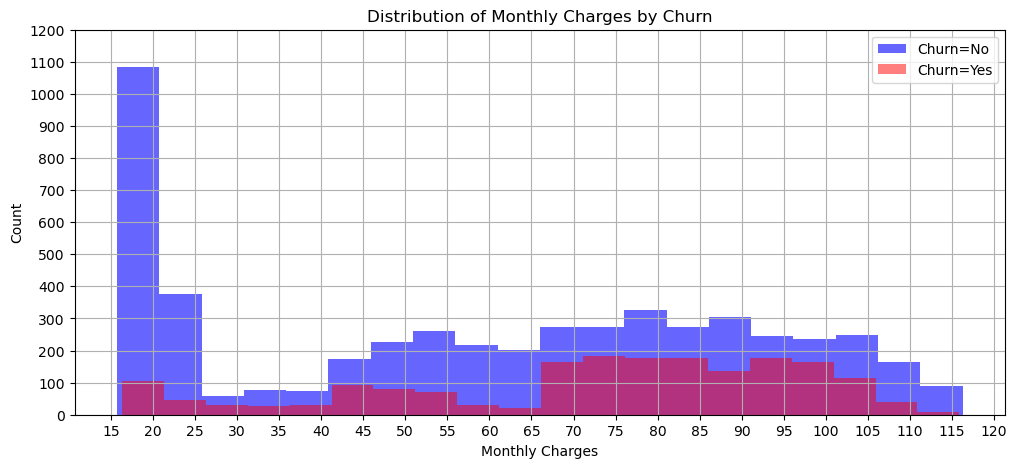

In [10]:
# Create the layered histogram
plt.figure(figsize=(12, 5))
df[df['Churn'] == 'No']['MonthlyCharges'].hist(alpha=0.6, bins=20, label='Churn=No', color='blue', stacked=True, align='left')
df[df['Churn'] == 'Yes']['MonthlyCharges'].hist(alpha=0.5, bins=20, label='Churn=Yes', color='red', stacked=True, align='left')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.xticks(range(15, 125, 5), rotation=0)
plt.yticks(range(0, 1300, 100), rotation=0)
plt.title('Distribution of Monthly Charges by Churn')
plt.legend()
plt.savefig('Distribution of Monthly Charges by Churn.png')
plt.show()

## Identify correlations between features using a heatmap.

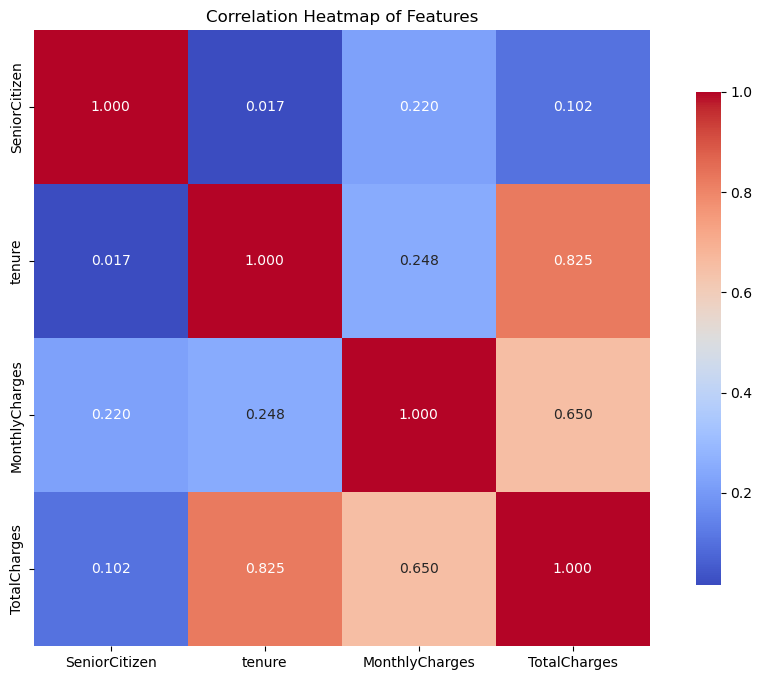

In [11]:
# Select relevant features for correlation analysis
# You can include or exclude features based on your analysis needs
features = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix
correlation_matrix = df[features].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, linecolor='black')

# Set the title
plt.title('Correlation Heatmap of Features')
plt.savefig('Correlation Matrix Heatmap.png')

# Show the plot
plt.show()